<a href="https://colab.research.google.com/github/Praz98/HomeLLC/blob/main/HomeLLC_basic_data_cleani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import seaborn as sns

In [ ]:
directory_path = "/content/drive/MyDrive/HOME LLC CSV"
files = os.listdir(directory_path)

In [ ]:

for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(directory_path, file)
        df = pd.read_csv(file_path)
        null_values = df.isnull().sum()
        print(f"Null values in {file}:")
        print(null_values)

Null values in GDP (1).csv:
DATE    0
GDP     0
dtype: int64
Null values in industrial_production_cement.csv:
DATE         0
IPN32731S    0
dtype: int64
Null values in MORTGAGE30US.csv:
DATE            0
MORTGAGE30US    0
dtype: int64
Null values in PERMIT.csv:
DATE      0
PERMIT    0
dtype: int64
Null values in population_quarterly.csv:
DATE               0
B230RC0Q173SBEA    0
dtype: int64
Null values in unemp_rate.csv:
DATE      0
UNRATE    0
dtype: int64
Null values in annual average expenditure 55-64.csv:
DATE                  0
CXUTOTALEXPLB0406M    0
dtype: int64
Null values in average expenditure 25-34.csv:
DATE                  0
CXUTOTALEXPLB0403M    0
dtype: int64
Null values in average expenditure 35-44.csv:
DATE                  0
CXUTOTALEXPLB0404M    0
dtype: int64
Null values in average_annual_expenditure_45-54.csv:
DATE                  0
CXUTOTALEXPLB0405M    0
dtype: int64
Null values in construction_workers_wages_index.csv:
DATE                 0
CIU2022300000000I  

In [ ]:
## For interpolating annual data to monthly data
monthly_rng = pd.date_range("01-2000","01-2021", freq = "M")
monthly_rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', length=252, freq='M')

In [ ]:
qtr_rng = pd.date_range("01-2000","01-2021", freq = "Q")
qtr_rng

DatetimeIndex(['2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31',
               '2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
      

In [ ]:
# Define a function to convert annual values to monthly values
def annual_monthly(annual_values, index_for_new_df, digits=2):
    # Initialize an empty list to store the monthly values
    monthly_values = []

    # Iterate over the annual values starting from the second element
    for i in range(1, len(annual_values)):
        # Calculate the annual change
        annual_change = annual_values[i] - annual_values[i - 1]

        # Calculate the monthly change by dividing the annual change by 12
        monthly_change = round(annual_change / 12, digits)

        # Initialize the previous value with the previous annual value
        prev_value = annual_values[i - 1]

        # Generate monthly values for the year
        for j in range(12):
            monthly_values.append(prev_value + monthly_change)
            prev_value = prev_value + monthly_change

    # Create a DataFrame from the monthly values with the provided index
    return pd.DataFrame(monthly_values, index=index_for_new_df)


# Define a function to convert quarterly values to monthly values
def quaterly_monthly(quaterly_values, index_for_new_df, digits=2):
    # Initialize an empty list to store the monthly values
    monthly_values = []

    # Iterate over the quarterly values starting from the second element
    for i in range(1, len(quaterly_values)):
        # Calculate the quarterly change
        quaterly_change = quaterly_values[i] - quaterly_values[i - 1]

        # Calculate the monthly change by dividing the quarterly change by 3
        monthly_change = round(quaterly_change / 3, digits)

        # Create a list of three monthly values based on the quarterly change
        tchange = [quaterly_values[i - 1] + monthly_change * k for k in range(3)]

        # Extend the monthly_values list with the three monthly values
        monthly_values.extend(tchange)

    # Create a DataFrame from the monthly values with the provided index
    return pd.DataFrame(monthly_values, index=index_for_new_df)


annual average expenditure 55-64.csv

In [ ]:


# Read the CSV file
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/annual average expenditure 55-64.csv")

# Select only the "DATE" and "CXUTOTALEXPLB0406M" columns
tdf = tdf[["DATE", "CXUTOTALEXPLB0406M"]]

# Convert the "DATE" column to a datetime format
tdf["DATE"] = pd.to_datetime(tdf["DATE"])

# Extract the year from the "DATE" column and store it in a new "Year" column
tdf["Year"] = tdf["DATE"].dt.year

# Apply the annual_monthly function to the "CXUTOTALEXPLB0406M" column
tdf = annual_monthly(tdf["CXUTOTALEXPLB0406M"], monthly_rng, 0)

# Rename the column to "avg_expenditure_55_64"
tdf.rename(columns={0: "avg_expenditure_55_64"}, inplace=True)

# Set the index to be in the format "Year-Month"
tdf.index = tdf.index.strftime("%Y-%m")

# Print the modified DataFrame
print(tdf)


         avg_expenditure_55_64
2000-01                39517.0
2000-02                39694.0
2000-03                39871.0
2000-04                40048.0
2000-05                40225.0
...                        ...
2020-08                68686.0
2020-09                69157.0
2020-10                69628.0
2020-11                70099.0
2020-12                70570.0

[252 rows x 1 columns]


In [ ]:
tdf.to_csv("/content/drive/MyDrive/cleaned data/avg-expenditure-55-64.csv",index=True)

 ##annual average expenditure 35-44.csv

In [ ]:

# Read the CSV file
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/average expenditure 35-44.csv")

# Select only the "DATE" and "CXUTOTALEXPLB0406M" columns
tdf = tdf[["DATE", "CXUTOTALEXPLB0404M"]]

# Convert the "DATE" column to a datetime format
tdf["DATE"] = pd.to_datetime(tdf["DATE"])

# Extract the year from the "DATE" column and store it in a new "Year" column
tdf["Year"] = tdf["DATE"].dt.year

# Apply the annual_monthly function to the "CXUTOTALEXPLB0406M" column
tdf = annual_monthly(tdf["CXUTOTALEXPLB0404M"], monthly_rng, 0)

# Rename the column to "avg_expenditure_35_44"
tdf.rename(columns={0: "avg_expenditure_35_44"}, inplace=True)

# Set the index to be in the format "Year-Month"
tdf.index = tdf.index.strftime("%Y-%m")

# Print the modified DataFrame
print(tdf)


tdf.to_csv("/content/drive/MyDrive/cleaned data/avg-expenditure-35-44.csv",index=True)

         avg_expenditure_35_44
2000-01                45296.0
2000-02                45443.0
2000-03                45590.0
2000-04                45737.0
2000-05                45884.0
...                        ...
2020-08                77865.0
2020-09                78328.0
2020-10                78791.0
2020-11                79254.0
2020-12                79717.0

[252 rows x 1 columns]


##annual average expenditure 25-34.csv

In [ ]:

# Read the CSV file
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/average expenditure 25-34.csv")

# Select only the "DATE" and "CXUTOTALEXPLB0406M" columns
tdf = tdf[["DATE", "CXUTOTALEXPLB0403M"]]

# Convert the "DATE" column to a datetime format
tdf["DATE"] = pd.to_datetime(tdf["DATE"])

# Extract the year from the "DATE" column and store it in a new "Year" column
tdf["Year"] = tdf["DATE"].dt.year

# Apply the annual_monthly function to the "CXUTOTALEXPLB0406M" column
tdf = annual_monthly(tdf["CXUTOTALEXPLB0403M"], monthly_rng, 0)

# Rename the column to "avg_expenditure_25_34"
tdf.rename(columns={0: "avg_expenditure_25_34"}, inplace=True)

# Set the index to be in the format "Year-Month"
tdf.index = tdf.index.strftime("%Y-%m")

# Print the first 5 rows of the DataFrame
print(tdf.head(100))

tdf.to_csv("/content/drive/MyDrive/cleaned data/avg-expenditure-25-34.csv",index=True)

         avg_expenditure_25_34
2000-01                38987.0
2000-02                39029.0
2000-03                39071.0
2000-04                39113.0
2000-05                39155.0
...                        ...
2007-12                48158.0
2008-01                48020.0
2008-02                47881.0
2008-03                47742.0
2008-04                47603.0

[100 rows x 1 columns]


##annual average expenditure 45-54.csv

In [ ]:

tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/average_annual_expenditure_45-54.csv")

# Select only the "DATE" and "CXUTOTALEXPLB0406M" columns
tdf = tdf[["DATE", "CXUTOTALEXPLB0405M"]]

# Convert the "DATE" column to a datetime format
tdf["DATE"] = pd.to_datetime(tdf["DATE"])

# Extract the year from the "DATE" column and store it in a new "Year" column
tdf["Year"] = tdf["DATE"].dt.year

# Apply the annual_monthly function to the "CXUTOTALEXPLB0406M" column
tdf = annual_monthly(tdf["CXUTOTALEXPLB0405M"], monthly_rng, 0)

# Rename the column to "avg_expenditure_45_54"
tdf.rename(columns={0: "avg_expenditure_45_54"}, inplace=True)

# Set the index to be in the format "Year-Month"
tdf.index = tdf.index.strftime("%Y-%m")

# Print the first 5 rows of the DataFrame
print(tdf.head(100))

tdf.to_csv("/content/drive/MyDrive/cleaned data/avg-expenditure-45-54.csv",index=True)

         avg_expenditure_45_54
2000-01                46308.0
2000-02                46456.0
2000-03                46604.0
2000-04                46752.0
2000-05                46900.0
...                        ...
2007-12                61175.0
2008-01                60973.0
2008-02                60767.0
2008-03                60561.0
2008-04                60355.0

[100 rows x 1 columns]


**consumer price index**

In [ ]:
# Import the pandas library and read a CSV file into a DataFrame
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/CPI.csv")

# Convert the 'DATE' column to datetime format
tdf['DATE'] = pd.to_datetime(tdf['DATE'])

# Format the 'DATE' column to have a year-month format ('YYYY-MM')
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')

# Rename the column 'CPALTT01USM657N' to 'CPI'
tdf.rename(columns={'CPALTT01USM657N': 'CPI'}, inplace=True)

# Set the 'DATE' column as the index of the DataFrame
tdf.set_index('DATE', inplace=True)

# Print the first 100 rows of the DataFrame
print(tdf.head(100))

# Write the cleaned DataFrame to a new CSV file with the index included
tdf.to_csv("/content/drive/MyDrive/cleaned data/consumer_price_index.csv", index=True)



              CPI
DATE             
2000-01  0.297089
2000-02  0.592417
2000-03  0.824499
2000-04  0.058411
2000-05  0.116754
...           ...
2007-12 -0.067086
2008-01  0.497058
2008-02  0.290411
2008-03  0.866821
2008-04  0.606478

[100 rows x 1 columns]


<Axes: xlabel='DATE', ylabel='CPI'>

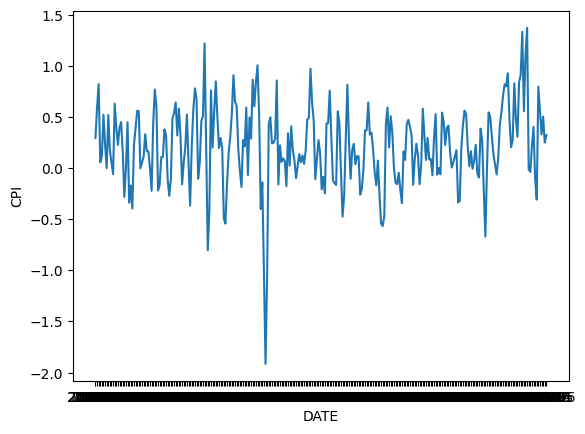

In [ ]:
sns.lineplot(data=tdf, x="DATE", y="CPI")

employees_construction.csv

In [ ]:
# Import the pandas library and read a CSV file into a DataFrame
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/employees_construction.csv")

# Convert the 'DATE' column to datetime format using the specified format "%Y-%m-%d"
tdf.DATE = pd.to_datetime(tdf.DATE, format="%Y-%m-%d")

# Format the 'DATE' column to have a year-month format ('YYYY-MM')
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')

# Set the 'DATE' column as the index of the DataFrame and drop the original 'DATE' column
tdf.set_index(tdf.DATE, drop=True, inplace=True)

# Drop the 'DATE' column, as it's now the index
tdf.drop(columns={"DATE"}, inplace=True)

# Filter the DataFrame to include data from January 2000 to December 2022
tdf = tdf["2000-01":"2022-12"]

# Rename the 'USCONS' column to 'employees_construction'
tdf.rename(columns={"USCONS": "employees_construction"}, inplace=True)

# Print the first 100 rows of the DataFrame
print(tdf.head(100))

# Write the cleaned DataFrame to a new CSV file with the index included
tdf.to_csv("/content/drive/MyDrive/cleaned data/employees_construction.csv", index=True)


         employees_construction
DATE                           
2000-01                    6752
2000-02                    6730
2000-03                    6811
2000-04                    6794
2000-05                    6770
...                         ...
2007-12                    7490
2008-01                    7476
2008-02                    7453
2008-03                    7406
2008-04                    7327

[100 rows x 1 columns]


<Axes: xlabel='DATE', ylabel='employees_construction'>

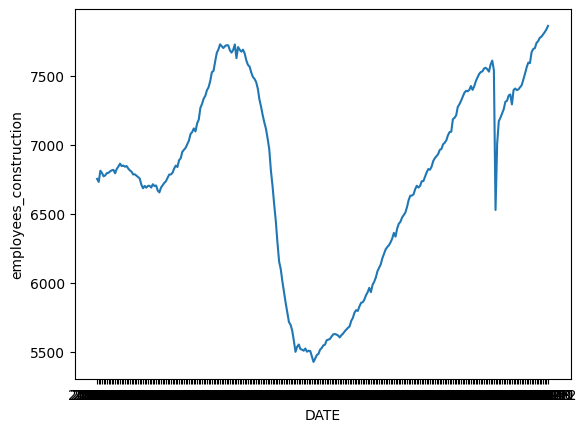

In [ ]:
sns.lineplot(data=tdf, x="DATE", y="employees_construction")

GDP

In [ ]:
# Import the pandas library and read a CSV file into a DataFrame
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/GDP (1).csv")

# Convert the 'DATE' column to datetime format using the specified format "%Y-%m-%d"
tdf.DATE = pd.to_datetime(tdf.DATE, format="%Y-%m-%d")

# Format the 'DATE' column to have a year-month format ('YYYY-MM')
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')

# Set the 'DATE' column as the index of the DataFrame and drop the original 'DATE' column
tdf.set_index(tdf.DATE, drop=True, inplace=True)

# Drop the 'DATE' column, as it's now the index
tdf.drop(columns={"DATE"}, inplace=True)

# Filter the DataFrame to include data from January 2000 to January 2021
tdf = tdf["2000-01":"2021-01"]

# Apply the 'quaterly_monthly' function to convert quarterly GDP values to monthly
tdf = quaterly_monthly(tdf.GDP, monthly_rng)

# Rename the column generated by 'quaterly_monthly' to 'GDP'
tdf.rename(columns={0: "GDP"}, inplace=True)

# Format the index to have a year-month format ('YYYY-MM')
tdf.index = tdf.index.strftime("%Y-%m")

# Write the cleaned DataFrame to a new CSV file with the index included
tdf.to_csv("/content/drive/MyDrive/cleaned data/GDP.csv", index=True)

# Return the modified DataFrame (optional)
tdf



,GDP
2000-01,10002.179
2000-02,10084.029
2000-03,10165.879
2000-04,10247.720
2000-05,10271.200
...,...
2020-08,21476.518
2020-09,21590.608
2020-10,21704.706
2020-11,21907.756


**HCAI_GOVT.xls**

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/HCAI_GOVT.csv")
quarters = {1:1,2:4,3:7,4:10}

tdf.Quarter= tdf.Quarter.map(quarters)
tdf.Year = tdf.Year.astype("str") + "-" + tdf.Quarter.astype("str")

tdf["DATE"] = pd.to_datetime(tdf.Year,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"Year","DATE","Quarter","Borrower\nRisk","Product\nRisk"},inplace=True)
tdf = tdf["2000-01":"2021-01"]
tdf = quaterly_monthly(tdf["Total\nRisk"],monthly_rng)


tdf.rename(columns = {0:"HCAI_GOVT"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")

tdf.to_csv("/content/drive/MyDrive/cleaned data/HCAI_GOVT.csv")
tdf

,HCAI_GOVT
2000-01,20.480000
2000-02,20.020000
2000-03,19.560000
2000-04,19.085000
2000-05,19.445000
...,...
2020-08,10.437101
2020-09,10.497101
2020-10,10.560697
2020-11,10.620697


HCAI_PP

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/HCAI_pp.csv")
quarters = {1:1,2:4,3:7,4:10}

tdf.Quarter= tdf.Quarter.map(quarters)
tdf.Year = tdf.Year.astype("str") + "-" + tdf.Quarter.astype("str")

tdf["DATE"] = pd.to_datetime(tdf.Year,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"Year","DATE","Quarter","Borrower\nRisk","Product\nRisk"},inplace=True)
tdf = tdf["2000-01":"2021-01"]
tdf = quaterly_monthly(tdf["Total\nRisk"],monthly_rng)


tdf.rename(columns = {0:"HCAI_PP"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf.to_csv("/content/drive/MyDrive/cleaned data/HCAI_pp.csv",index=True)
tdf

,HCAI_PP
2000-01,17.087188
2000-02,16.927188
2000-03,16.767188
2000-04,16.593754
2000-05,16.183754
...,...
2020-08,2.708029
2020-09,2.728029
2020-10,2.743789
2020-11,2.763789


HCAI GSE

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/HCAI_GSE.csv")
quarters = {1:1,2:4,3:7,4:10}

tdf.Quarter= tdf.Quarter.map(quarters)
tdf.Year = tdf.Year.astype("str") + "-" + tdf.Quarter.astype("str")

tdf["DATE"] = pd.to_datetime(tdf.Year,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"Year","DATE","Quarter","Borrower\nRisk","Product\nRisk"},inplace=True)
tdf = tdf["2000-01":"2021-01"]
tdf = quaterly_monthly(tdf["Total\nRisk"],monthly_rng)


tdf.rename(columns = {0:"HCAI_GSE"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf.to_csv("/content/drive/MyDrive/cleaned data/HCAI_GSE.csv",index=True)
tdf

,HCAI_GSE
2000-01,6.699503
2000-02,6.639503
2000-03,6.579503
2000-04,6.517766
2000-05,6.437766
...,...
2020-08,2.534484
2020-09,2.534484
2020-10,2.533458
2020-11,2.543458


houses_for_sale_to_houses_sold

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/houses_for_sale_to_houses_sold.csv")
tdf["DATE"] = pd.to_datetime(tdf.DATE,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)

tdf = tdf["2000-01":"2021-01"]
tdf.rename(columns={"MSACSR":"houses-for-sale-to-sold"},inplace=True)

tdf.to_csv("/content/drive/MyDrive/cleaned data/housesale_to_housesold.csv",index=True)
tdf

,houses-for-sale-to-sold
DATE,
2000-01,4.3
2000-02,4.3
2000-03,4.3
2000-04,4.4
2000-05,4.4
...,...
2020-09,3.4
2020-10,3.3
2020-11,4.0


MORTGAGE30US.csv

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/MORTGAGE30US.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.set_index("DATE",inplace=True)
tdf = tdf.resample("M").mean()
tdf.index = tdf.index.strftime("%Y-%m")
tdf = tdf["2000-01":"2021-01"]
tdf.to_csv("/content/drive/MyDrive/cleaned data/MORTGAGE30US.csv",index=True)
tdf

,MORTGAGE30US
DATE,
2000-01,8.2100
2000-02,8.3250
2000-03,8.2400
2000-04,8.1525
2000-05,8.5150
...,...
2020-09,2.8900
2020-10,2.8340
2020-11,2.7650


new_privately_owned_housing_under_construction

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/new_privately_owned_housing_under_construction.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.set_index("DATE",inplace=True)

tdf.index = tdf.index.strftime("%Y-%m")
tdf = tdf["2000-01":"2020-12"]
tdf.rename(columns={"UNDCONTSA":"pvt_owned_house_under_const"},inplace=True)
tdf.to_csv("/content/drive/MyDrive/cleaned data/new_privately_owned_housing_under_construction.csv")
tdf

,pvt_owned_house_under_const
DATE,
2000-01,991.0
2000-02,998.0
2000-03,988.0
2000-04,989.0
2000-05,985.0
...,...
2020-08,1213.0
2020-09,1218.0
2020-10,1228.0


Permits_Granted_Monthly.csv

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/PERMIT.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.rename(columns={"PERMIT(th)":"permits"},inplace=True)
tdf = tdf["2000-01":"2020-12"]

tdf.to_csv("/content/drive/MyDrive/cleaned data/Permits_Granted_Monthly.csv")
tdf

,PERMIT
DATE,
2000-01,1727.0
2000-02,1692.0
2000-03,1651.0
2000-04,1597.0
2000-05,1543.0
...,...
2020-08,1564.0
2020-09,1643.0
2020-10,1622.0


personal saving rate.csv

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/personal saving rate.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.rename(columns={"PSAVERT":"personal_saving_rate"},inplace=True)
tdf = tdf["2000-01":"2020-12"]

tdf.to_csv("/content/drive/MyDrive/cleaned data/personal saving rate.csv")
tdf

,personal_saving_rate
DATE,
2000-01,5.0
2000-02,4.5
2000-03,4.3
2000-04,4.8
2000-05,4.8
...,...
2020-08,15.5
2020-09,14.6
2020-10,14.0


population_quarterly

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/population_quarterly.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf = quaterly_monthly(tdf["B230RC0Q173SBEA"],monthly_rng)
tdf.rename(columns = {0:"population"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
# tdf
tdf.to_csv("/content/drive/MyDrive/cleaned data/Population.csv")
tdf

,population
2000-01,281304.00
2000-02,281536.67
2000-03,281769.34
2000-04,282002.00
2000-05,282257.67
...,...
2020-08,331929.67
2020-09,331987.34
2020-10,332045.00
2020-11,332026.33


privately_owned_housing_units_completed.csv

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/privately_owned_housing_units_completed.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

# tdf = quaterly_monthly(tdf["B230RC0Q173SBEA"],monthly_rng)
tdf.rename(columns = {"COMPUTSA":"house_units_completed"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# tdf.index = tdf.index.strftime("%Y-%m")
# # tdf
tdf.to_csv("../content/drive/MyDrive/cleaned data/privately_owned_housing_units_completed.csv")
tdf

,house_units_completed
DATE,
2000-01,1574.0
2000-02,1677.0
2000-03,1704.0
2000-04,1610.0
2000-05,1682.0
...,...
2020-09,1446.0
2020-10,1370.0
2020-11,1240.0


retail_sales_home_furnishing_stores.csv

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/retail_sales_home_furnishing_stores.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf.rename(columns = {"MRTSSM442USS":"retail_sales_home_furnishing_stores"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../content/drive/MyDrive/cleaned data/retail_sales_home_furnishing_stores.csv")
tdf

,retail_sales_home_furnishing_stores
DATE,
2000-01,7484.0
2000-02,7548.0
2000-03,7599.0
2000-04,7729.0
2000-05,7673.0
...,...
2020-09,10737.0
2020-10,10594.0
2020-11,10452.0


Unemployment rate.csv

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/unemp_rate.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf.rename(columns = {"MRTSSM442USS":"unrate"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../content/drive/MyDrive/cleaned data/Unemployment rate.csv")
tdf

,UNRATE
DATE,
2000-01,4.0
2000-02,4.1
2000-03,4.0
2000-04,3.8
2000-05,4.0
...,...
2020-09,7.9
2020-10,6.9
2020-11,6.7


unemployment_rate_construction.csv

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/unemployment_rate_construction.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf.rename(columns = {"LNU04032231":"unrate_construction"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../content/drive/MyDrive/cleaned data/unrate_construction.csv")
tdf

<ipython-input-31-680cc590c59f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf.rename(columns = {"LNU04032231":"unrate_construction"},inplace=True)
<ipython-input-31-680cc590c59f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf.drop(columns={"DATE"},inplace=True)


,unrate_construction
DATE,
2000-01,9.7
2000-02,10.6
2000-03,8.7
2000-04,5.8
2000-05,5.0
...,...
2020-09,7.1
2020-10,6.8
2020-11,7.3


Industrial_production_cement

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/industrial_production_cement.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf.rename(columns = {"IPN32731S":"industrial_production_cement"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../content/drive/MyDrive/cleaned data/industrial_production_cement.csv")
tdf

,industrial_production_cement
DATE,
2000-01,144.6130
2000-02,143.9732
2000-03,151.6946
2000-04,142.1024
2000-05,143.7562
...,...
2020-09,101.6846
2020-10,102.8240
2020-11,104.7750


producer_price_index_concrete_brick.csv

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/producer_price_index_concrete_brick.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf.rename(columns = {"PCU32733132733106":"producer_price_index_concrete_brick"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../content/drive/MyDrive/cleaned data/producer_price_index_concrete_brick.csv")
tdf

,producer_price_index_concrete_brick
DATE,
2000-01,143.2
2000-02,143.7
2000-03,143.7
2000-04,143.7
2000-05,149.2
...,...
2020-09,263.3
2020-10,263.3
2020-11,263.3


Target

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/S&PCase-Shiller U.S. National Home Price Index.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf.rename(columns = {"CSUSHPISA":"target"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.to_csv("../content/drive/MyDrive/cleaned data/target.csv")
tdf

,target
DATE,
2000-01,100.551
2000-02,101.339
2000-03,102.126
2000-04,102.922
2000-05,103.677
...,...
2020-09,225.937
2020-10,229.888
2020-11,233.253


job gains private.csv

In [ ]:
# Define the function to convert quarterly to monthly values
def quarterly_to_monthly(df, column_name, digits=2):
    monthly_values = []

    for i in range(0, len(df), 4):
        quarterly_values = df[column_name].iloc[i:i+4].tolist()
        for quarterly_change in quarterly_values:
            monthly_change = round(quarterly_change / 3, digits)
            monthly_values.extend([monthly_change] * 3)

    new_index = pd.date_range(start=f"{df['Year'].min()}-01-01", end=f"{df['Year'].max()}-12-31", freq='M')
    new_df = pd.DataFrame(monthly_values, index=new_index, columns=[column_name])

    # Modify the index to display year-month only
    new_df.index = new_df.index.strftime('%Y-%m')

    return new_df

# Load your CSV data
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/JOB GAIN.csv")

# Define the column name for your quarterly values and apply the function
column_name = "Value"
monthly_rng = pd.date_range(start=f"{tdf['Year'].min()}-01-01", end=f"{tdf['Year'].max()}-12-31", freq='M')
tdf = quarterly_to_monthly(tdf, column_name)

# Rename the column
tdf.rename(columns={column_name: "job_gains_private"}, inplace=True)

# Save the modified DataFrame to a CSV file
tdf.to_csv("/content/drive/MyDrive/cleaned data/job_gains_private.csv")

# Display the modified DataFrame
tdf


,job_gains_private
2000-01,3001.33
2000-02,3001.33
2000-03,3001.33
2000-04,2813.00
2000-05,2813.00
...,...
2022-08,2938.00
2022-09,2938.00
2022-10,2681.67
2022-11,2681.67


homeownershiprate.csv



In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/homeownershiprate.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf = tdf["2000-01":"2023-01"]
tdf = quaterly_monthly(tdf.RHORUSQ156N,monthly_rng)


tdf.rename(columns = {0:"homeownership"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf.to_csv("/content/drive/MyDrive/cleaned data/homeownership.csv",index=True)
tdf


,homeownership
2000-01,67.10
2000-02,67.13
2000-03,67.16
2000-04,67.20
2000-05,67.37
...,...
2022-08,65.97
2022-09,65.94
2022-10,65.90
2022-11,65.93


In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/residentialsa-ValueOfConstruction.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf.rename(columns = {"PRRESCONS":"residential_const_val"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.to_csv("../content/drive/MyDrive/cleaned data/residential_const_val.csv")
tdf

,residential_const_val
DATE,
2000-01,353065.0
2000-02,351933.0
2000-03,353452.0
2000-04,356188.0
2000-05,349907.0
...,...
2020-09,662353.0
2020-10,684180.0
2020-11,702717.0


In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/S&PCase-Shiller U.S. National Home Price Index.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf.rename(columns = {"CSUSHPISA":"target"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.to_csv("../content/drive/MyDrive/cleaned data/target.csv")
tdf

,target
DATE,
2000-01,100.551
2000-02,101.339
2000-03,102.126
2000-04,102.922
2000-05,103.677
...,...
2020-09,225.937
2020-10,229.888
2020-11,233.253


In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/HOME LLC CSV/nonresidentialsa-valueOfConstriction-Monthly.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2000-01":"2021-01"]

tdf.rename(columns = {"PNRESCONS":"nonresidential_const_val"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.to_csv("../content/drive/MyDrive/cleaned data/nonresidential_const_val.csv")
tdf

,nonresidential_const_val
DATE,
2000-01,247213.0
2000-02,265200.0
2000-03,268020.0
2000-04,264832.0
2000-05,275989.0
...,...
2020-09,483009.0
2020-10,486381.0
2020-11,479857.0


In [ ]:
import os
import pandas as pd

# Replace with your Google Drive directory path
directory_path = "/content/drive/MyDrive/cleaned data"

# List all files in the directory
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# Loop through CSV files
for file_name in csv_files:
    file_path = os.path.join(directory_path, file_name)

    # Read CSV into DataFrame
    df = pd.read_csv(file_path)

    # Check if 'Unnamed: 0' column exists and rename it to 'DATE'
    if 'Unnamed: 0' in df.columns:
        df.rename(columns={'Unnamed: 0': 'DATE'}, inplace=True)

    # Set 'DATE' column as the index
    df.set_index('DATE', inplace=True)

    # Name the index column as 'DATE'
    df.index.name = 'DATE'

    # Get column names including the index column
    column_names = df.columns.tolist()

    # Display file name and column names
    print(f"File Name: {file_name}")
    print(f"Column Names: {', '.join(column_names)}\n")


File Name: avg-expenditure-55-64.csv
Column Names: avg_expenditure_55_64

File Name: avg-expenditure-35-44.csv
Column Names: avg_expenditure_35_44

File Name: avg-expenditure-25-34.csv
Column Names: avg_expenditure_25_34

File Name: avg-expenditure-45-54.csv
Column Names: avg_expenditure_45_54

File Name: consumer_price_index.csv
Column Names: CPI

File Name: employees_construction.csv
Column Names: employees_construction

File Name: HCAI_GOVT.csv
Column Names: HCAI_GOVT

File Name: housesale_to_housesold.csv
Column Names: houses-for-sale-to-sold

File Name: HCAI_pp.csv
Column Names: HCAI_PP

File Name: HCAI_GSE.csv
Column Names: HCAI_GSE

File Name: MORTGAGE30US.csv
Column Names: MORTGAGE30US

File Name: GDP.csv
Column Names: GDP

File Name: Permits_Granted_Monthly.csv
Column Names: PERMIT

File Name: new_privately_owned_housing_under_construction.csv
Column Names: pvt_owned_house_under_const

File Name: personal saving rate.csv
Column Names: personal_saving_rate

File Name: Populatio

In [ ]:
import os
import pandas as pd

# Replace with your Google Drive directory path
directory_path = "/content/drive/MyDrive/cleaned data"

# List all files in the directory
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through CSV files
for file_name in csv_files:
    file_path = os.path.join(directory_path, file_name)

    # Read CSV into DataFrame
    df = pd.read_csv(file_path)

    # Check if 'Unnamed: 0' column exists and rename it to 'DATE'
    if 'Unnamed: 0' in df.columns:
        df.rename(columns={'Unnamed: 0': 'DATE'}, inplace=True)

    # Set 'DATE' column as the index and name the index column as 'DATE'
    df.set_index('DATE', inplace=True)
    df.index.name = 'DATE'

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames along the columns axis (join columns based on index)
result_df = pd.concat(dfs, axis=1)

# Define the start and end dates for removal
start_date = '2021-01'
end_date = '2023-06'

# Use DataFrame slicing to remove rows within the specified date range
filtered_df = result_df.loc[(result_df.index < start_date) | (result_df.index > end_date)]

# Save the filtered DataFrame back to the same file
filtered_df.to_csv(os.path.join(directory_path, 'merged_data.csv'))


In [ ]:
dtf =pd.read_csv("/content/drive/MyDrive/cleaned data/merged_data.csv")
print(dtf.columns)

Index(['DATE', 'avg_expenditure_55_64', 'avg_expenditure_35_44',
       'avg_expenditure_25_34', 'avg_expenditure_45_54', 'CPI',
       'employees_construction', 'HCAI_GOVT', 'houses-for-sale-to-sold',
       'HCAI_PP', 'HCAI_GSE', 'MORTGAGE30US', 'GDP', 'PERMIT',
       'pvt_owned_house_under_const', 'personal_saving_rate', 'population',
       'house_units_completed', 'retail_sales_home_furnishing_stores',
       'UNRATE', 'unrate_construction', 'industrial_production_cement',
       'producer_price_index_concrete_brick', 'job_gains_private',
       'residential_const_val', 'target', 'homeownership',
       'nonresidential_const_val'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the merged DataFrame
merged_df = pd.read_csv('/content/drive/MyDrive/cleaned data/merged_data.csv', index_col='DATE')

# Check if 'gdp' and 'population' columns exist
if 'GDP' in merged_df.columns and 'population' in merged_df.columns:
    # Calculate GDP per capita and create a new column
    merged_df['gdp_per_capita'] = merged_df['GDP'] / merged_df['population']

    # Save the updated DataFrame back to the same file
   # merged_df.to_csv('/content/drive/MyDrive/cleaned data/merged_data.csv')
else:
    print("Columns 'gdp' and 'population' not found in the DataFrame.")


In [ ]:
dtf =pd.read_csv("/content/drive/MyDrive/cleaned data/merged_data.csv")
print(dtf.columns)

Index(['DATE', 'avg_expenditure_55_64', 'avg_expenditure_35_44',
       'avg_expenditure_25_34', 'avg_expenditure_45_54', 'CPI',
       'employees_construction', 'HCAI_GOVT', 'houses-for-sale-to-sold',
       'HCAI_PP', 'HCAI_GSE', 'MORTGAGE30US', 'GDP', 'PERMIT',
       'pvt_owned_house_under_const', 'personal_saving_rate', 'population',
       'house_units_completed', 'retail_sales_home_furnishing_stores',
       'UNRATE', 'unrate_construction', 'industrial_production_cement',
       'producer_price_index_concrete_brick', 'job_gains_private',
       'residential_const_val', 'target', 'homeownership',
       'nonresidential_const_val'],
      dtype='object')
